<a target="_blank" rel="noopener noreferrer" href="https://colab.research.google.com/github/ccaudek/ds4psy_2023/blob/main/500_intro_frequentist.ipynb">![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)</a>

(intro-frequentist-inference-notebook)=
# Introduzione all'inferenza frequentista

Ci sono due approcci principali per l'inferenza statistica: la statistica frequentista e la statistica bayesiana. Questi metodi consentono di fare conclusioni sulla popolazione di interesse attraverso l'analisi dei dati. Entrambi gli approcci sono usati per stimare quantità sconosciute, fare previsioni e testare ipotesi, ma differiscono nella loro interpretazione della probabilità e in come integrano le conoscenze precedenti ed evidenze.

Nella statistica frequentista, la probabilità viene interpretata come la frequenza relativa a lungo termine di un evento in un numero infinito di prove. Questo approccio si basa sull'idea che il vero valore di un parametro della popolazione sia fisso, ma sconosciuto e debba essere stimato dai dati. In questo contesto, le inferenze statistiche vengono ottenute a partire dai dati osservati, mediante l'utilizzo di tecniche come la stima puntuale, gli intervalli di confidenza e il test di ipotesi, e facendo alcune assunzioni riguardo al processo sottostante che genera i dati.

D'altra parte, la statistica bayesiana interpreta la probabilità come una misura di convinzione o grado di certezza riguardo a un evento. Questo approccio consente di incorporare conoscenze pregresse ed evidenze nell'analisi statistica attraverso l'uso del teorema di Bayes. In questo contesto, il vero valore di un parametro della popolazione è trattato come una variabile casuale e viene continuamente aggiornato man mano che vengono raccolti nuovi dati. Ciò porta alla formazione di una distribuzione completa nello spazio dei parametri, nota come distribuzione a posteriori, che può essere utilizzata per fare previsioni probabilistiche e quantificare l'incertezza associata.

In questo capitolo, approfondiremo il concetto di *distribuzione campionaria* che costituisce uno dei pilastri dell'inferenza statistica frequentista. La distribuzione campionaria ci permette di comprendere come le stime dei parametri della popolazione, come la media o la varianza, cambiano da campione a campione. In particolare, la distribuzione campionaria ci consente di stabilire delle proprietà probabilistiche delle stime campionarie, come ad esempio la loro media e la loro varianza. Queste proprietà sono utili per costruire gli intervalli di fiducia e i test di ipotesi che costituiscono gli strumenti principali dell'inferenza statistica frequentista.

In breve, il concetto di distribuzione campionaria rappresenta un elemento fondamentale dell'approccio frequentista all'inferenza statistica e ci consente di comprendere come le stime campionarie si comportano da un punto di vista probabilistico.

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import statistics as st
import scipy.stats as stats
import math
import arviz as az
import itertools

In [2]:
# Initialize random number generator
RANDOM_SEED = 8927
rng = np.random.default_rng(RANDOM_SEED)

plt.style.use("bmh")
plt.rcParams["figure.figsize"] = [10, 6]
plt.rcParams["figure.dpi"] = 100
plt.rcParams["figure.facecolor"] = "white"

sns.set_theme(palette="colorblind")

%load_ext autoreload
%autoreload 2
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
%config InlineBackend.figure_format = "svg"

## Stime, stimatori e parametri

Quando si analizzano i dati, solitamente si è interessati ad una quantità a livello di popolazione, tuttavia di solito si ha accesso solo ad un campione di osservazioni. La quantità sconosciuta di cui siamo interessati viene chiamata *parametro*. La statistica che calcoliamo utilizzando i dati del campione viene chiamata *stima*, e la formula che la produce viene chiamata *stimatore*. Formalmente, uno stimatore è una funzione dei dati osservati utilizzati per produrre una stima di un parametro. 

In altre parole, quando analizziamo un campione di dati, vogliamo inferire alcune proprietà della popolazione di cui il campione è rappresentativo. Il parametro rappresenta la misura di tali proprietà, ma spesso non è possibile calcolarlo direttamente sulla popolazione, quindi lo stimiamo utilizzando le osservazioni del campione. La stima è quindi l'approssimazione del valore del parametro che otteniamo dal nostro campione, mentre lo stimatore è la formula matematica utilizzata per calcolare questa stima.

Tuttavia, le stime non sono necessariamente identiche ai parametri di nostro interesse. In altre parole, le nostre stime presentano una certa incertezza dovuta alla variabilità del campionamento. In questo capitolo esamineremo come l'approccio frequentista quantifica l'incertezza nelle nostre stime in modo da poter trarre conclusioni sul parametro. 

## Distribuzione campionaria

In questo capitolo, affronteremo il problema dell'utilizzo della media di un campione casuale per stimare il parametro $\mu$ corrispondente alla media della popolazione da cui è stato estratto il campione. Per caratterizzare l'incertezza della stima di un parametro, l'approccio frequentista utilizza lo strumento statistico della *distribuzione campionaria*.

Per comprendere il concetto di distribuzione campionaria, considereremo il caso di una popolazione finita di dimensioni ridotte. Tuttavia, le stesse proprietà che esamineremo si applicano alle popolazioni di qualsiasi dimensione.

In questa simulazione, ipotizziamo la seguente popolazione:

In [3]:
x = np.array([2, 4.5, 5, 5.5])
print(x)

[2.  4.5 5.  5.5]


L'istogramma sottostante descrive la distribuzione di frequenza della popolazione.

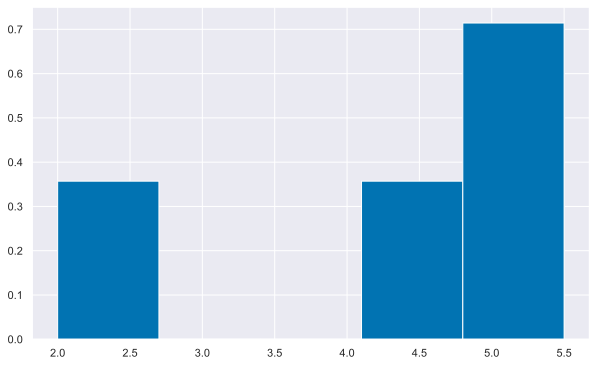

In [4]:
plt.hist(x, bins=5, density=True)
plt.show()

Calcoliamo la media e la varianza della popolazione.

In [6]:
(np.mean(x), np.var(x, ddof=0))


(4.25, 1.8125)

Prendiamo ora in considerazione l'estrazione di tutti i campioni possibili di dimensione $n$ = 2 dalla popolazione. Per ottenere un array con tutte le possibili coppie di valori estratti dall'array `x`, possiamo utilizzare la funzione `product` del modulo `itertools`. Impostiamo l'argomento `repeat` a 2 per indicare che vogliamo coppie di valori. Successivamente, convertiamo la lista di tuple risultante in un array NumPy utilizzando la funzione `np.array`, e infine stampiamo il risultato. L'output ottenuto sarà un array con 16 righe e 2 colonne, che rappresenta tutte le possibili coppie di valori che possono essere estratti dall'array `x`.

In [7]:
# Create an array with all the pairs of possible values
samples = np.array(list(itertools.product(x, repeat=2)))
print(samples)

[[2.  2. ]
 [2.  4.5]
 [2.  5. ]
 [2.  5.5]
 [4.5 2. ]
 [4.5 4.5]
 [4.5 5. ]
 [4.5 5.5]
 [5.  2. ]
 [5.  4.5]
 [5.  5. ]
 [5.  5.5]
 [5.5 2. ]
 [5.5 4.5]
 [5.5 5. ]
 [5.5 5.5]]


In [ ]:
# total number of samples
len(list(itertools.product(x, x)))

Per calcolare la media di ogni campione di ampiezza $n=2$, possiamo utilizzare la funzione `mean` del modulo NumPy e applicarla lungo l'asse delle colonne dell'array di coppie di valori. In questo modo otterremo un array unidimensionale contenente la media di ciascuna coppia di valori. Questo insieme di valori costituisce la *distribuzione campionaria* delle medie di campioni di ampiezza $n=2$ che possono essere estratti dalla popolazione `x`.

In [8]:
# Create an array with the mean of each sample
means = np.mean(samples, axis=1)
print(means)

[2.   3.25 3.5  3.75 3.25 4.5  4.75 5.   3.5  4.75 5.   5.25 3.75 5.
 5.25 5.5 ]


Una rappresentazione grafica della distribuzione campionaria dei campioni di ampiezza $n$ = 2 che possono essere estratti dalla popolazione `x` è fornita qui sotto.

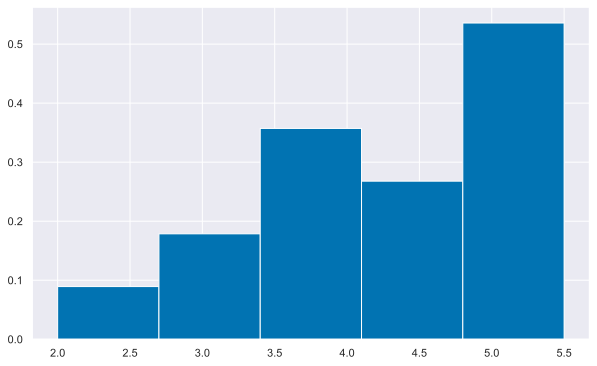

In [10]:
plt.hist(means, bins=5, density=True)
plt.show()


Mostriamo qui nuovamente la lista di tutti i possibili campioni di ampiezza 2 insieme alla media di ciascun campione.

In [11]:
df = pd.DataFrame()
df["Samples"] = list(itertools.product(x, x))
df["x_bar"] = np.mean(list(itertools.product(x, x)), axis=1)
df

,Samples,x_bar
0,"(2.0, 2.0)",2.00
1,"(2.0, 4.5)",3.25
2,"(2.0, 5.0)",3.50
3,"(2.0, 5.5)",3.75
4,"(4.5, 2.0)",3.25
5,"(4.5, 4.5)",4.50
6,"(4.5, 5.0)",4.75
7,"(4.5, 5.5)",5.00
8,"(5.0, 2.0)",3.50
9,"(5.0, 4.5)",4.75


Procediamo ora al calcolo della media della distribuzione campionaria delle medie di campioni di ampiezza $n$ = 2 che possono essere estratti dalla popolazione `x`. Sappiamo che, se la variabile aleatoria $X$ è distribuita con media $\mu$ e varianza $\sigma^2$, allora la media della distribuzione dei campioni casuali indipendenti di ampiezza $n$ = 2 sarà:

$$
\mathbb{E}(\bar{X}_n) = \frac{1}{n} \mathbb{E}(S_n) = \frac{1}{n} n \mu = \mu.
$$

Verifichiamo che ciò sia vero nel nostro caso specifico.

In [12]:
(np.mean(x), np.mean(means))


(4.25, 4.25)

Verifichiamo che la varianza della distribuzione dei campioni casuali indipendenti di ampiezza $n=2$ che possono essere estratti dalla popolazione $X$ con varianza $\sigma^2$ sia $\mathbb{V}(\bar{X})=\sigma^2/n$. 

Considerando la definizione di varianza, possiamo scrivere:

$$
\begin{aligned}
\mathbb{V}(\bar{X}) &= \mathbb{E}[(\bar{X}-\mu_{\bar{X}})^2] \\
&= \mathbb{E}[(\bar{X} - \mu)^2] \\
&= \mathbb{E}[(X_1+X_2)/2 - \mu)^2] \\
&= \mathbb{E}[((X_1 - \mu) + (X_2 - \mu))/2)^2] \\
&= \mathbb{E}[(X_1 - \mu)^2/4 + (X_2 - \mu)^2/4 + (X_1 - \mu)(X_2 - \mu)/2)] \\
&= \frac{1}{4}\mathbb{E}[(X_1 - \mu)^2] + \frac{1}{4}\mathbb{E}[(X_2 - \mu)^2] + \frac{1}{2}\mathbb{E}[(X_1 - \mu)(X_2 - \mu)] \\
&= \frac{1}{4}\mathbb{V}(X_1) + \frac{1}{4}\mathbb{V}(X_2) + \frac{1}{2}\mathbb{C}(X_1,X_2) \\
&= \frac{\sigma^2}{4} + \frac{\sigma^2}{4} + 0 \\
&= \frac{\sigma^2}{2}
\end{aligned}
$$

Dove $\mu_{\bar{X}}$ è la media della distribuzione campionaria delle medie di campioni di ampiezza $n=2$ e $\mathbb{C}(X_1,X_2)$ è la covarianza tra $X_1$ e $X_2$. In questo caso, dato che i campioni sono estratti in modo casuale e indipendente, la covarianza tra $X_1$ e $X_2$ è 0. Pertanto, abbiamo dimostrato che $\mathbb{V}(\bar{X})=\sigma^2/n$ per $n=2$.

Il valore teorico della varianza delle medie dei campioni è dunque pari a

In [ ]:
np.var(x, ddof=0) / 2

0.90625

Lo stesso risultato si ottiene facendo la media delle 16 medie che abbiamo trovato in precedenza.

In [ ]:
np.var(means, ddof=0) 

0.90625

Consideriamo ora un particolare campione. Per esempio

In [ ]:
observed_sample = np.array([5, 5.5])
print(observed_sample)

[5.  5.5]


Troviamo la media del campione:

In [ ]:
sample_mean = np.mean(observed_sample)
print(sample_mean)

5.25


La media del campione è diversa dalla media della popolazione ($\mu$ = 4.25).

Troviamo la deviazione standard del campione:

In [ ]:
sample_sd = np.std(observed_sample, ddof=1)
print(sample_sd)

0.3535533905932738


La deviazione standard del campione è diversa dalla deviazione standard della popolazione:

In [ ]:
np.std(x, ddof=0)

1.346291201783626

In conclusione, si presti attenzione a due aspetti importanti:

- la media della distribuzione delle medie campionarie è uguale alla media della popolazione,
- la varianza della distribuzione delle medie campionarie è minore della varianza della popolazione, ovvero è pari alla varianza della popolazione divisa per l'ampiezza campionaria.

Questi due risultati che abbiamo ottenuto empiricamente nella simulazione possono essere espressi in maniera formale dicendo che la media di campioni casuali estratti con ripetizione da una popolazione finita (oppure da una popolazione infinita) di media $\mu$ e varianza $\sigma^2$ ha valore atteso
$
\mathbb{E}(\bar{X}_n) = \mu
$
e varianza
$
\mathbb{V}(\bar{X}_n) = \frac{\sigma^2}{n}.
$
Inoltre, se la popolazione segue una distribuzione normale, allora per le proprietà della distribuzione normale, anche la distribuzione delle medie dei campioni seguirà una distribuzione normale. Al contrario, se la popolazione non segue una distribuzione normale, il teorema del limite centrale garantisce che, all'aumentare delle dimensioni del campione, la distribuzione delle medie dei campioni tenderà a una distribuzione normale.

## Teorema del limite centrale

Esaminiamo ora più in dettaglio il teorema del limite centrale. Nel 1812, Laplace dimostrò il teorema del limite centrale (TLC), che afferma che la somma di una sequenza di variabili casuali indipendenti tende a distribuirsi come una distribuzione Normale. Inoltre, il TLC stabilisce i parametri della distribuzione Normale risultante in base ai valori attesi e alle varianze delle variabili casuali che vengono sommate.

```{admonition} Teorema
Si supponga che $Y = Y_1, \dots, Y_i, \ldots, Y_n$ sia una sequenza di v.a. i.i.d. con $\mathbb{E}(Y_i) = \mu$ e $SD(Y_i) = \sigma$. Si definisca una nuova v.c. come:

$$
Z = \frac{1}{n} \sum_{i=1}^n Y_i.
$$

Con $n \rightarrow \infty$, $Z$ tenderà ad una Normale con lo stesso valore atteso di $Y_i$ e una deviazione standard che sarà più piccola della deviazione standard originaria di un fattore pari a $\frac{1}{\sqrt{n}}$:

$$
p_Z(z) \rightarrow \mathcal{N}\left(z \ \Bigg| \ \mu, \, \frac{1}{\sqrt{n}} \cdot \sigma \right).
$$
```

Il TLC può essere generalizzato a variabili casuali che non hanno la stessa distribuzione, a condizione che siano indipendenti e abbiano aspettative e varianze finite. Molti fenomeni naturali, come l'altezza dell'uomo adulto di entrambi i generi, sono il risultato di una combinazione di effetti additivi relativamente piccoli. Questi effetti, indipendentemente dalla loro distribuzione, tendono a portare alla normalità della distribuzione risultante. Questa è la ragione per cui la distribuzione normale fornisce una buona approssimazione per la distribuzione di molti fenomeni naturali.

Per illustrare il TLC, possiamo utilizzare una simulazione. Ad esempio, consideriamo una popolazione iniziale fortemente asimmetrica, come una distribuzione Beta(2, 1). Estraiamo da questa popolazione 50.000 campioni di ampiezza $n$ e costruiamo la distribuzione campionaria di tali campioni.

In [14]:
# parameters of the beta
a=2
b=1

def plotSamples(n):
    # create normal distribution with mean and standard deviation of the beta
    mu = a / (a+b)
    sigma = math.sqrt( a*b / (a+b)**2 / (a+b+1) )
    x = np.linspace(mu - 3*sigma, mu + 3*sigma, 100)
    y = stats.norm.pdf(x, mu, sigma/math.sqrt(n))

    # find sample means from samples of "ramped" beta distribution
    values = []
    for i in range(n):
        v = []
        for j in range(50000):
          v.append(np.random.beta(a,b))
        values.append(v)
    df = pd.DataFrame(values)
    sample_means = df.mean(axis=0)

    # plot a histogram of the distribution of sample means, together 
    # with the population distribution
    fig, ax = plt.subplots(sharex=True)
    sns.histplot(sample_means)
    ax2 = ax.twinx()
    sns.lineplot(x=x,y=y, ax=ax2, color='black')
    ax.set(yticklabels=[])
    ax2.set(yticklabels=[])
    ax.set(ylabel=None)
    ax2.set(ylabel=None)
    ax.tick_params(left=False)
    ax2.tick_params(right=False)
    ax.set_title("Ampiezza campionaria = " + str(n))
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax2.spines['top'].set_visible(False)
    ax2.spines['right'].set_visible(False)


Se l'ampiezza campionaria è 1, allora la ditribuzione campionaria delle medie coincide con la popolazione.

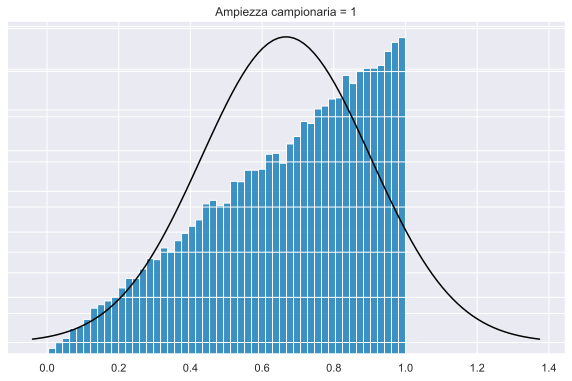

In [15]:
plotSamples(1)

Con $n$ = 2, la distribuzione delle medie dei campioni non è certamente Normale, inizia ad avvicinarsi alla gaussianità.

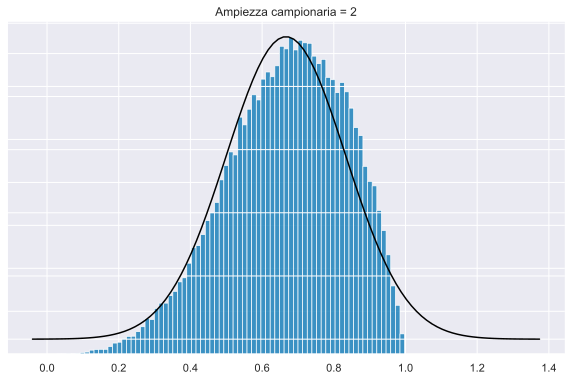

In [16]:
plotSamples(2)

Con $n$ = 4 c'è ancora una grande differenza tra la distribuzione campionaria delle medie dei campioni e la distribuzione normale, ma l'approssimazione migliora.

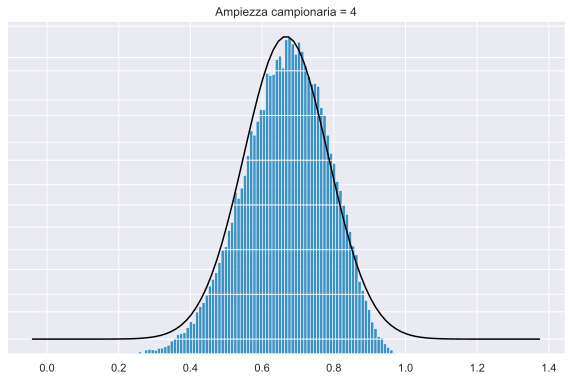

In [17]:
plotSamples(4)

Con $n$ = 30 la funzione $\mathcal{N}(100, 15/\sqrt{50})$ fornisce una buona approssimazione alla distribuzione campionaria delle medie dei campioni.

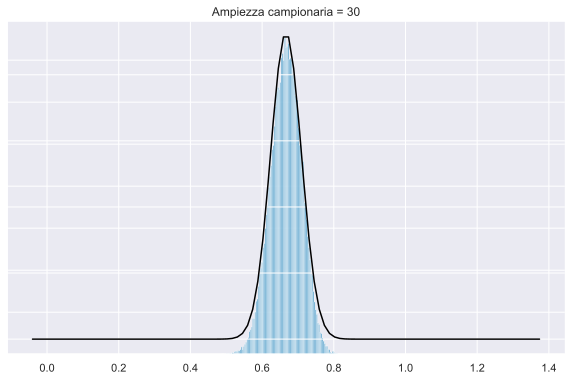

In [18]:
plotSamples(30)

In conclusione, il teorema del limite centrale (TLC) mostra che, salvo per campioni molto piccoli, la distribuzione campionaria della media dei campioni può essere ben approssimata dalla Normale, indipendentemente dalla forma della distribuzione della popolazione. Ciò significa che, per campioni sufficientemente grandi, il TLC ci fornisce una formula esplicita per la forma della distribuzione campionaria della media dei campioni, anche in assenza di conoscenze sulla popolazione di media $\mu$ e deviazione standard $\sigma$: $\bar{X} \sim \mathcal{N}(\mu, \sigma/\sqrt{n})$.

Il risultato del TLC ha una grande utilità in molti ambiti. Infatti, ci aiuta a comprendere perché i risultati degli esperimenti con un grande numero di osservazioni sono più affidabili rispetto a quelli con un numero ridotto di osservazioni. Inoltre, il TLC ci fornisce una formula esplicita per l'errore standard ($\sigma/\sqrt{n}$), che ci consente di valutare l'affidabilità degli esperimenti al variare della dimensione del campione. 

Negli esperimenti psicologici, molti dei fenomeni che vogliamo misurare sono in realtà medie di molteplici variabili (ad esempio, l'intelligenza "generale" misurata dal QI è una media di un gran numero di abilità specifiche), e in questi casi la quantità media segue una distribuzione normale. Questa legge matematica ci permette di osservare spesso la distribuzione normale nei dati degli esperimenti psicologici e in molte altre discipline scientifiche.

## Distribuzioni campionarie di altre statistiche

In precedenza abbiamo descritto la distribuzione campionaria della media dei campioni. Ma ovviamente è possibile costruire la distribuzione campionaria di altre statistiche campionarie.  Ad esempio, la figura seguente mostra l'approssimazione empirica della distribuzione campionaria del valore massimo del campione. È chiaro che, se da ciascun campione estraiamo il valore massimo, il valore atteso della distribuzione campionaria di questa statistica sarà maggiore della media della popolazione.

<Axes: >

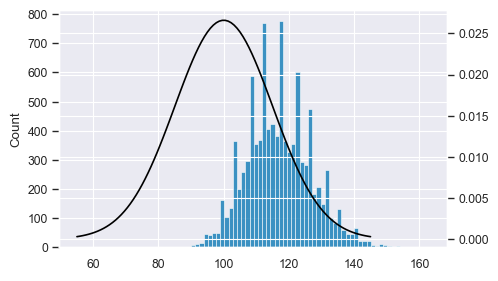

In [14]:
# define a normal distribution with a mean of 100 and a standard deviation of 15
mu = 100
sigma = 15
x = np.linspace(mu - 3 * sigma, mu + 3 * sigma, 100)
y = stats.norm.pdf(x, mu, sigma)

# run 10000 simulated experiments with 5 subjects each, and find the maximum score for each experiment
sample_maxes = []
for i in range(1, 10000):
    sample_max = max(np.random.normal(loc=100, scale=15, size=5).astype(int))
    sample_maxes.append(sample_max)

# plot a histogram of the distribution of sample maximums, together with the population distribution
fig, ax = plt.subplots()
sns.histplot(sample_maxes, ax=ax)
ax2 = ax.twinx()
sns.lineplot(x=x, y=y, ax=ax2, color="black")


La distribuzione campionaria della varianza dei campioni è particolarmente interessante. Usiamo la formula della statistica descrittiva, ovvero

$$
S^2 = \frac{\sum_{i=1}^n (Y_i - \bar{Y})^2}{n}.
$$

Una volta compresa la procedura, possiamo creare un grafico che rappresenta l'approssimazione empirica della distribuzione campionaria della varianza dei punteggi del quoziente di intelligenza. Sapendo che la varianza della popolazione è uguale a $15^2$, abbiamo utilizzato la simulazione per stimare la varianza della popolazione. Tuttavia, il risultato ottenuto è stato interessante: in media, l'utilizzo della formula precedente ha portato a una stima della varianza della popolazione troppo piccola. Gli statistici chiamano questa discrepanza *distorsione*, ovvero quando il valore atteso di uno stimatore non coincide con il parametro.

180.04637931267774

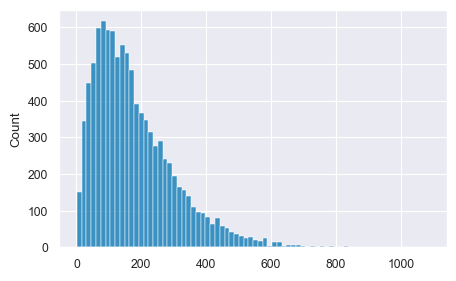

In [15]:
# define a normal distribution with a mean of 100 and a standard 
# deviation of 15
mu = 100
sigma = 15
x = np.linspace(0, 30)
y = stats.norm.pdf(x, mu, sigma)

# run 10000 simulated experiments with 5 subjects each, and find 
# the variance score for each experiment
sample_vars = []
for i in range(1,10000):
    sample_var = np.var(np.random.normal(loc=100,scale=15,size=5))
    sample_vars.append(sample_var)

# plot a histogram of the distribution of sample variance
fig, ax = plt.subplots()
sns.histplot(sample_vars, ax=ax)

np.mean(sample_vars)

Abbiamo già visto come questo problema trova una semplice soluzione nel momento in cui usiamo $n-1$ al denominatore.

226.57694474740248

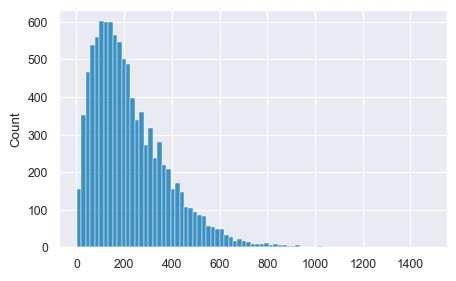

In [16]:
# define a normal distribution with a mean of 100 and a standard 
# deviation of 15
mu = 100
sigma = 15
x = np.linspace(0, 30)
y = stats.norm.pdf(x, mu, sigma)

# run 10000 simulated experiments with 5 subjects each, and find 
# the variance score for each experiment
sample_vars = []
for i in range(1,10000):
    sample_var = np.var(np.random.normal(loc=100,scale=15,size=5), ddof=1)
    sample_vars.append(sample_var)

# plot a histogram of the distribution of sample variance
fig, ax = plt.subplots()
sns.histplot(sample_vars, ax=ax)

np.mean(sample_vars)

La differenza tra la stima di un parametro e il valore vero del parametro è chiamata *errore della stima*. Uno stimatore si dice *non distorto* (*unbiased*) se la media delle sue stime su molteplici campioni ipotetici è uguale al valore del parametro che si vuole stimare. In altre parole, l'errore medio di stima è zero. 

In questo capitolo abbiamo visto che $\frac{\sum_{i=1}^n{X_i}}{n}$ è uno stimatore non distorto di $\mu$ e che $\frac{\sum_{i=1}^n{(^2)}}{n-1}$ è uno stimatore non distorto di $\sigma^2$. Questo significa che tali stimatori hanno una distribuzione campionaria centrata sul vero valore del parametro. 

## Considerazioni conclusive

In generale, i parametri della popolazione sono sconosciuti, ma possiamo stimarli utilizzando le informazioni del campione. Di seguito viene presentata una tabella che riassume i simboli comuni utilizzati per indicare le quantità note e sconosciute nel contesto dell'inferenza statistica. Questo ci aiuterà a tenere traccia di ciò che sappiamo e ciò che non sappiamo.

|Simbolo          | Nome           | È qualcosa che conosciamo?     |
|:----------------|:-------------|:--------------------|
|$s$              |Deviazione standard del campione    |Sì, la calcoliamo dai dati grezzi |
|$\sigma$         |Deviazione standard della popolazione  | No, tranne in casi particolari o nelle simulazioni  |
|$\hat{\sigma}$  | Stima della deviazione standard della popolazione | Sì, ma non è uguale a $\sigma$ |
|$s^2$            | Varianza del campione    |Sì, la calcoliamo dai dati grezzi |
|$\sigma^2$       | Varianza della popolazione  | No, tranne in casi particolari o nelle simulazioni  |
|$\hat{\sigma}^2$ | Stima della varianza della popolazione  | Sì, ma non è uguale a $\sigma^2$  |

Utilizzando le informazioni di un campione casuale di ampiezza $n$:

- La stima migliore che possiamo ottenere per la media $\mu$ della popolazione è la media del campione $\bar{Y}$.
- La stima migliore che possiamo ottenere per la varianza $\sigma^2$ della popolazione è:

$$
\hat{\sigma}^2 = \frac{1}{n-1} \sum_{i=1}^n (Y_i - \bar{Y})^2.
$$

## Watermark

In [ ]:
%load_ext watermark
%watermark -n -u -v -iv 